In [2]:
import pandas as pd

col_names = ['image_no', 'image_name', 'score']
results = pd.read_csv('results/pae-latent_dim=4-use_flow=false/selections-pae.csv', header=None, 
             index_col=0, names=col_names)

results['is_outlier'] = results['image_name'].str.startswith(' mnist')

In [19]:
results.sort_values(by='image_no').reset_index()['is_outlier'].astype(int).to_csv('labels.csv', header=None)

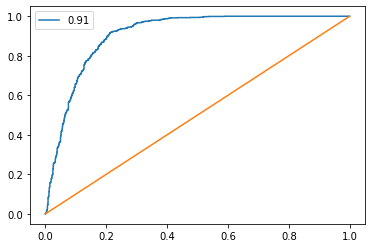

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, _ = roc_curve(results['is_outlier'], results['score'])
score = roc_auc_score(results['is_outlier'], results['score'])

plt.figure()
plt.plot(fpr, tpr, label='%0.2f' % score)
plt.plot([0,1], [0,1])
plt.legend()

In [14]:
import os
from dora_exp_pipeline.dora_results_organization import save_comparison_plot

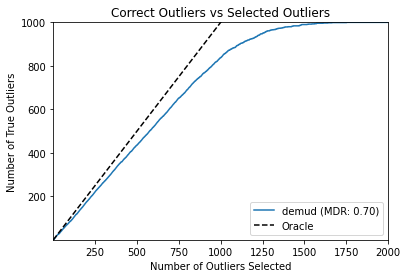

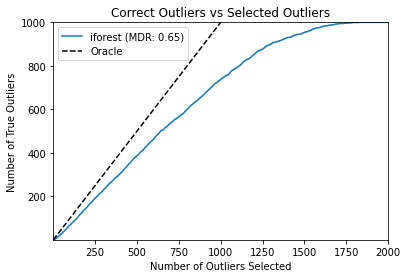

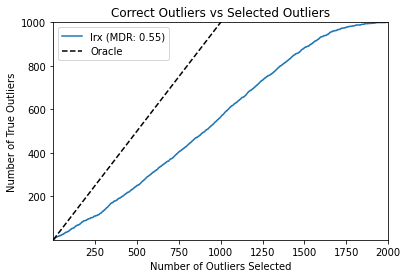

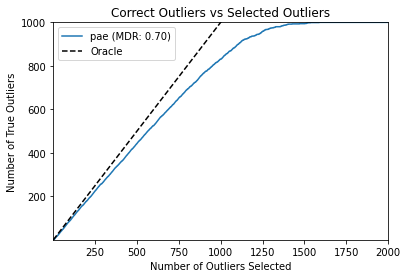

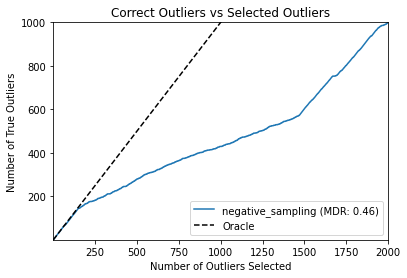

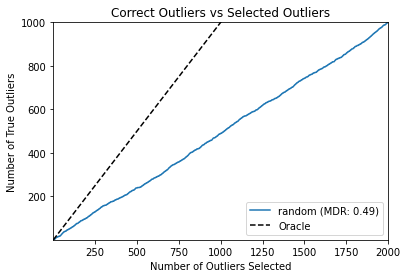

In [15]:
plot_args = {
    'data_ids': None,
    'dts_scores': None,
    'dts_sels': '',
    'data_to_score': None,
    'outlier_alg_name': '',
    'out_dir': '',
    'logger': None,
    'seed': None,
    'top_n': None,
    'validation_dir': 'labels.csv'
}

col_names = ['image_no', 'image_name', 'score']

for alg_dir in os.listdir('results')[2:]:
    out_dir = os.path.join('results', alg_dir)
    alg_name = alg_dir.split('-')[0]
    file_name = os.path.join(out_dir, f'selections-{alg_name}.csv')
    results = pd.read_csv(file_name, header=None, index_col=0, names=col_names)
    plot_args['dts_sels'] = results['image_no']
    plot_args['outlier_alg_name'] = alg_name
    plot_args['out_dir'] = out_dir
    save_comparison_plot.run(**plot_args)